In [5]:
#pip install tweepy

In [6]:
#pip install vader

In [7]:
#pip install textblob

In [8]:
#pip install WordCloud

In [9]:
import os 
import tweepy as tw
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import vader
plt.style.use('fivethirtyeight')

In [10]:
api_key= 'O3kqiekIgTsZZBwq4nkkAjcNL'
consumer_secret= 'hFOiSYByWJDcW8L1swN99zARi4Upc1UFcdP3PiyjgtWmwFE1A2'
access_token= 'AAAAAAAAAAAAAAAAAAAAAI7YKgEAAAAAtcRvKDPqYf6g9rrNcg3qwpcfgz0%3DiEm20utx2nGg5aubTJkFads7SQqKEjSTKsp62NOg0i7WNM3Dti'

In [11]:
auth = tw.OAuthHandler(api_key, consumer_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [12]:
search_words = ["vaccine"]
date_since = "2020-12-16"
max_tweets = 100

In [13]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(max_tweets)
tweets

In [14]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(max_tweets)

# Iterate and print tweets
# for tweet in tweets:
#     print(tweet.text)

In [15]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(max_tweets)

# Collect a list of tweets
[tweet.text for tweet in tweets]


['RT @JoeBiden: Today, I received the COVID-19 vaccine.\n\nTo the scientists and researchers who worked tirelessly to make this possible — than…',
 'RT @JoeBiden: Today, I received the COVID-19 vaccine.\n\nTo the scientists and researchers who worked tirelessly to make this possible — than…',
 'RT @JoeBiden: Today, I received the COVID-19 vaccine.\n\nTo the scientists and researchers who worked tirelessly to make this possible — than…',
 'RT @MADtastically: People are being worried about the vaccine being done in 9 months when we should be thinking about what else could be do…',
 "RT @SheriAWilkinson: Today's big F&amp;ck you goes to Joni Ernst! The B*tch that claimed COVID was a hoax, who received her covid vaccine today…",
 'RT @gyasiwa_: they announced a vaccine, corona announced a new strain. omo this thing is fighting us fr 😂😂😂',
 '@ShawnHarder1 @ani_daly @ToxicTeutonic So you even know what inside the vaccine? Who would want that inside of them?',
 'RT @thegoodgodabove: NEW COMMA

In [59]:
new_search = []
for word in search_words:
    new_search.append(word + " -filter:retweets")

In [79]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since,
                            country_code = "US",
                  country = "United States").items(max_tweets)

users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.text, tweet.retweet_count, tweet.favorite_count] for tweet in tweets]
users_locs

[['gianna__nicole1',
  '',
  'RT @ErinBrockovich: No Covid denying politician should get a vaccine before every Dr, nurse, hospital worker, EMT, cop, fire fighter, teach…',
  3165,
  0],
 ['LaurenEdie',
  '',
  'RT @NotHoodlum: They laughed at a pandemic, mocked wearing masks, pushed false cures and made sure they were the first in line for the vacc…',
  13175,
  0],
 ['HebdenMichelle',
  'Beaverton, OR',
  'RT @ErinBrockovich: No Covid denying politician should get a vaccine before every Dr, nurse, hospital worker, EMT, cop, fire fighter, teach…',
  3165,
  0],
 ['Camz99',
  'Edinburgh, Scotland',
  'Doctors and nurses at London’s frontline hospital denied coronavirus vaccine | The Independent https://t.co/mCd0lBr7gu',
  0,
  0],
 ['jcjacksparrow',
  'jersey shore',
  'RT @Bakari_Sellers: .@marcorubio and @LindseyGrahamSC got the vaccine before Sadies transplant team.',
  3969,
  0],
 ['diverchick71',
  'Whereever the boat is anchored',
  'RT @DanPriceSeattle: To recap: Congress made 

In [80]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location", "text", "retweets", "favorites"])

In [81]:
tweet_text['text'] = tweet_text['text'].apply(cleanTxt)

In [97]:
tweet_text[tweet_text.location != 'null']

,user,userid,number of followers,location,text,retweets,favorites
0,gianna__nicole1,3485722452,326,,RT @ErinBrockovich: No Covid denying politicia...,3169,0
1,LaurenEdie,329871741,150,,"RT @NotHoodlum: They laughed at a pandemic, mo...",13179,0
2,HebdenMichelle,958040488275136513,83,"Beaverton, OR",RT @ErinBrockovich: No Covid denying politicia...,3169,0
3,Camz99,204923510,6359,"Edinburgh, Scotland",Doctors and nurses at London’s frontline hospi...,0,0
4,jcjacksparrow,796034617,197,jersey shore,RT @Bakari_Sellers: .@marcorubio and @LindseyG...,3969,0
...,...,...,...,...,...,...,...
95,paulettepaulaa,1184189304727392256,24,,"RT @gyasiwa_: they announced a vaccine, corona...",1836,0
96,BaduguTelugu,2355634093,965,,RT @tanmayj41128048: And Govt should take away...,6,0
97,chloedancer,15367365,1508,"Los Angeles, CA","RT @JRehling: In a cemetery, once, I saw the g...",52,0
98,Fpvcandids,1329163031243350018,32,,"RT @JoeBiden: Today, I received the COVID-19 v...",12970,0


In [98]:
# mostpop = tweet_text.nlargest(500, ['retweets', 'favorites'])

# pd.DataFrame(mostpop)

In [99]:
# uniques = mostpop['text'].unique()

# uniques

In [100]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text)
 text = re.sub('#', '', text)
 text = re.sub('RT[\s]+', '', text)
 text = re.sub('https?:\/\/\S+', '', text)
 
 return text

In [101]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


tweet_text['Subjectivity'] = tweet_text['text'].apply(getSubjectivity)
tweet_text['Polarity'] = tweet_text['text'].apply(getPolarity)

tweet_text.head()

,user,userid,number of followers,location,text,retweets,favorites,Subjectivity,Polarity
0,gianna__nicole1,3485722452,326,,RT @ErinBrockovich: No Covid denying politicia...,3169,0,0.000000,0.0000
1,LaurenEdie,329871741,150,,"RT @NotHoodlum: They laughed at a pandemic, mo...",13179,0,0.505556,0.2625
2,HebdenMichelle,958040488275136513,83,"Beaverton, OR",RT @ErinBrockovich: No Covid denying politicia...,3169,0,0.000000,0.0000
3,Camz99,204923510,6359,"Edinburgh, Scotland",Doctors and nurses at London’s frontline hospi...,0,0,0.125000,0.0000
4,jcjacksparrow,796034617,197,jersey shore,RT @Bakari_Sellers: .@marcorubio and @LindseyG...,3969,0,0.000000,0.0000


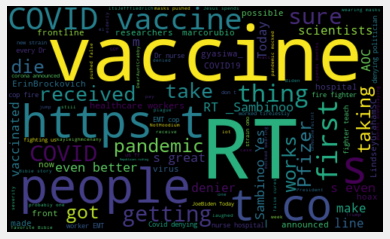

In [102]:
allWords = ' '.join([twts for twts in tweet_text['text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [103]:
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

tweet_text['Analysis'] = tweet_text['Polarity'].apply(getAnalysis)

tweet_text.head()


,user,userid,number of followers,location,text,retweets,favorites,Subjectivity,Polarity,Analysis
0,gianna__nicole1,3485722452,326,,RT @ErinBrockovich: No Covid denying politicia...,3169,0,0.000000,0.0000,Neutral
1,LaurenEdie,329871741,150,,"RT @NotHoodlum: They laughed at a pandemic, mo...",13179,0,0.505556,0.2625,Positive
2,HebdenMichelle,958040488275136513,83,"Beaverton, OR",RT @ErinBrockovich: No Covid denying politicia...,3169,0,0.000000,0.0000,Neutral
3,Camz99,204923510,6359,"Edinburgh, Scotland",Doctors and nurses at London’s frontline hospi...,0,0,0.125000,0.0000,Neutral
4,jcjacksparrow,796034617,197,jersey shore,RT @Bakari_Sellers: .@marcorubio and @LindseyG...,3969,0,0.000000,0.0000,Neutral


In [104]:
print('Printing positive tweets:\n')
j=1
sortedDF = tweet_text.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['text'][i])
    print()
    j= j+1

Printing positive tweets:

1) RT @NotHoodlum: They laughed at a pandemic, mocked wearing masks, pushed false cures and made sure they were the first in line for the vacc…

2) RT @DanPriceSeattle: To recap: Congress made $174,000 in publicly-funded pay this year, had free publicly-funded health care, months of pub…

3) RT @_Sambinoo: Yes i am taking the vaccine. If it works then that’s great and if i die then that’s even better

4) RT @_Sambinoo: Yes i am taking the vaccine. If it works then that’s great and if i die then that’s even better

5) RT @45thMaga: Make sure to push in the plunger?!?! Otherwise no vaccine is really ministered. 

#JoeBiden receives #Covid19 #vaccine on liv…

6) RT @DrMichaelMensah: Getting that Pfizer vaccine after several days of research and anticipation! Feeling better about seeing patients in t…

7) RT @itsJeffTiedrich: my favorite Bible story is the probably one where Jesus spends months downplaying the severity of a plague and then el…

8) RT @_chismosa_:

In [105]:
# import nltk
# nltk.download('vader_lexicon')
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [106]:
def getVader(text):
    return sid.polarity_scores(text)

tweet_text['Vader Polarity'] = tweet_text['text'].apply(getVader)

tweet_text

,user,userid,number of followers,location,text,retweets,favorites,Subjectivity,Polarity,Analysis,Vader Polarity
0,gianna__nicole1,3485722452,326,,RT @ErinBrockovich: No Covid denying politicia...,3169,0,0.000000,0.000000,Neutral,"{'neg': 0.285, 'neu': 0.65, 'pos': 0.065, 'com..."
1,LaurenEdie,329871741,150,,"RT @NotHoodlum: They laughed at a pandemic, mo...",13179,0,0.505556,0.262500,Positive,"{'neg': 0.08, 'neu': 0.734, 'pos': 0.185, 'com..."
2,HebdenMichelle,958040488275136513,83,"Beaverton, OR",RT @ErinBrockovich: No Covid denying politicia...,3169,0,0.000000,0.000000,Neutral,"{'neg': 0.285, 'neu': 0.65, 'pos': 0.065, 'com..."
3,Camz99,204923510,6359,"Edinburgh, Scotland",Doctors and nurses at London’s frontline hospi...,0,0,0.125000,0.000000,Neutral,"{'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'comp..."
4,jcjacksparrow,796034617,197,jersey shore,RT @Bakari_Sellers: .@marcorubio and @LindseyG...,3969,0,0.000000,0.000000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...,...,...,...,...,...
95,paulettepaulaa,1184189304727392256,24,,"RT @gyasiwa_: they announced a vaccine, corona...",1836,0,0.454545,0.136364,Positive,"{'neg': 0.198, 'neu': 0.802, 'pos': 0.0, 'comp..."
96,BaduguTelugu,2355634093,965,,RT @tanmayj41128048: And Govt should take away...,6,0,0.000000,0.000000,Neutral,"{'neg': 0.068, 'neu': 0.809, 'pos': 0.123, 'co..."
97,chloedancer,15367365,1508,"Los Angeles, CA","RT @JRehling: In a cemetery, once, I saw the g...",52,0,0.133333,-0.050000,Negative,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp..."
98,Fpvcandids,1329163031243350018,32,,"RT @JoeBiden: Today, I received the COVID-19 v...",12970,0,1.000000,0.000000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [107]:
tweet_text['compound']  = tweet_text['Vader Polarity'].apply(lambda score_dict: score_dict['compound'])

tweet_text.head()

,user,userid,number of followers,location,text,retweets,favorites,Subjectivity,Polarity,Analysis,Vader Polarity,compound
0,gianna__nicole1,3485722452,326,,RT @ErinBrockovich: No Covid denying politicia...,3169,0,0.000000,0.0000,Neutral,"{'neg': 0.285, 'neu': 0.65, 'pos': 0.065, 'com...",-0.6597
1,LaurenEdie,329871741,150,,"RT @NotHoodlum: They laughed at a pandemic, mo...",13179,0,0.505556,0.2625,Positive,"{'neg': 0.08, 'neu': 0.734, 'pos': 0.185, 'com...",0.4588
2,HebdenMichelle,958040488275136513,83,"Beaverton, OR",RT @ErinBrockovich: No Covid denying politicia...,3169,0,0.000000,0.0000,Neutral,"{'neg': 0.285, 'neu': 0.65, 'pos': 0.065, 'com...",-0.6597
3,Camz99,204923510,6359,"Edinburgh, Scotland",Doctors and nurses at London’s frontline hospi...,0,0,0.125000,0.0000,Neutral,"{'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'comp...",-0.4404
4,jcjacksparrow,796034617,197,jersey shore,RT @Bakari_Sellers: .@marcorubio and @LindseyG...,3969,0,0.000000,0.0000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [108]:
tweet_text['comp_score'] = tweet_text['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

tweet_text.head()

,user,userid,number of followers,location,text,retweets,favorites,Subjectivity,Polarity,Analysis,Vader Polarity,compound,comp_score
0,gianna__nicole1,3485722452,326,,RT @ErinBrockovich: No Covid denying politicia...,3169,0,0.000000,0.0000,Neutral,"{'neg': 0.285, 'neu': 0.65, 'pos': 0.065, 'com...",-0.6597,neg
1,LaurenEdie,329871741,150,,"RT @NotHoodlum: They laughed at a pandemic, mo...",13179,0,0.505556,0.2625,Positive,"{'neg': 0.08, 'neu': 0.734, 'pos': 0.185, 'com...",0.4588,pos
2,HebdenMichelle,958040488275136513,83,"Beaverton, OR",RT @ErinBrockovich: No Covid denying politicia...,3169,0,0.000000,0.0000,Neutral,"{'neg': 0.285, 'neu': 0.65, 'pos': 0.065, 'com...",-0.6597,neg
3,Camz99,204923510,6359,"Edinburgh, Scotland",Doctors and nurses at London’s frontline hospi...,0,0,0.125000,0.0000,Neutral,"{'neg': 0.195, 'neu': 0.805, 'pos': 0.0, 'comp...",-0.4404,neg
4,jcjacksparrow,796034617,197,jersey shore,RT @Bakari_Sellers: .@marcorubio and @LindseyG...,3969,0,0.000000,0.0000,Neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [109]:
len(tweet_text['comp_score'])

tweet_text['comp_score'].value_counts()

pos    61
neg    39
Name: comp_score, dtype: int64

In [110]:
tweet_text['Analysis'].value_counts()

Positive    50
Neutral     34
Negative    16
Name: Analysis, dtype: int64

In [111]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since,
                            country_code = "US",
                  country = "United States").items(max_tweets)

users_locs = [[tweet.user.screen_name, tweet.user.id, tweet.user.followers_count, tweet.user.location, tweet.text, tweet.retweet_count, tweet.favorite_count] for tweet in tweets]
users_locs

[['gathara',
  15659814,
  173557,
  'Nairobi',
  'RT @OhNoSheTwitnt: For a virus that’s a hoax there sure are a lot of Republicans rushing to get that vaccine before the healthcare workers…',
  17498,
  0],
 ['eTRADE_dak',
  1328498449101303808,
  3,
  'NYSE',
  'RT @NotHoodlum: They laughed at a pandemic, mocked wearing masks, pushed false cures and made sure they were the first in line for the vacc…',
  13191,
  0],
 ['Sisu56693590',
  1242126047987949568,
  18,
  '',
  '@Craig_A_Spencer How have you tolerated the vaccine?',
  0,
  0],
 ['inezsneks',
  936066809966616579,
  6083,
  '',
  'RT @Cleavon_MD: It’s the final countdown! After 10 months on the frontlines, I just got word that I’m scheduled to get the Moderna vaccine…',
  728,
  0],
 ['SheilaHurt2',
  2326079924,
  55,
  '',
  'RT @danwentzel: @NotHoodlum @jkbelk It is disgraceful that any Republican politicians who treated COVID as a hoax, mocked mask wearing, and…',
  17,
  0],
 ['ClaytonBrown94',
  164154997,
  156,
  'Cl

In [96]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "userid", "number of followers", "location", "text", "retweets", "favorites"])

In [78]:
tweet_text['text'] = tweet_text['text'].apply(cleanTxt)